<a href="https://colab.research.google.com/github/imabhinav-singh/Recommender-Systems/blob/main/DataSet_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/googleplaystore.csv") 

In [ ]:
#App with largest number of reviews 
data['Reviews'] = pd.to_numeric(data['Reviews'],errors='coerce')
data.sort_values('Reviews',ascending=False).iloc[0]['App']

'Facebook'

In [ ]:
"""
Paid Vs Free
"""
print("Free Apps",len(data[data['Type'] == "Free"]))
print("Paid Apps",len(data[data['Type'] == "Paid"]))

Free Apps 10039
Paid Apps 800


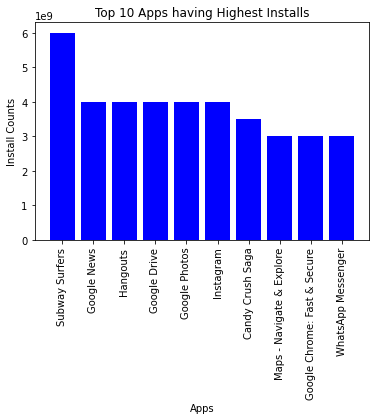

In [ ]:
"""
App with the largest number of installs
"""
data['Installs'] = data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
i = data[data['Category'] == '1.9'].index
data.loc[i]
data = data.drop(i)

data['Installs'] = data['Installs'].astype(int)
res = data.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)


plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

In [ ]:
"""
Data Visualizataion
"""

def compute_app_types(df):
    """
    Given a dataframe, compute the number 
    of free and paid apps respectively
    """
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))  
    ax.tick_params(labelrotation=90)
    return stats

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


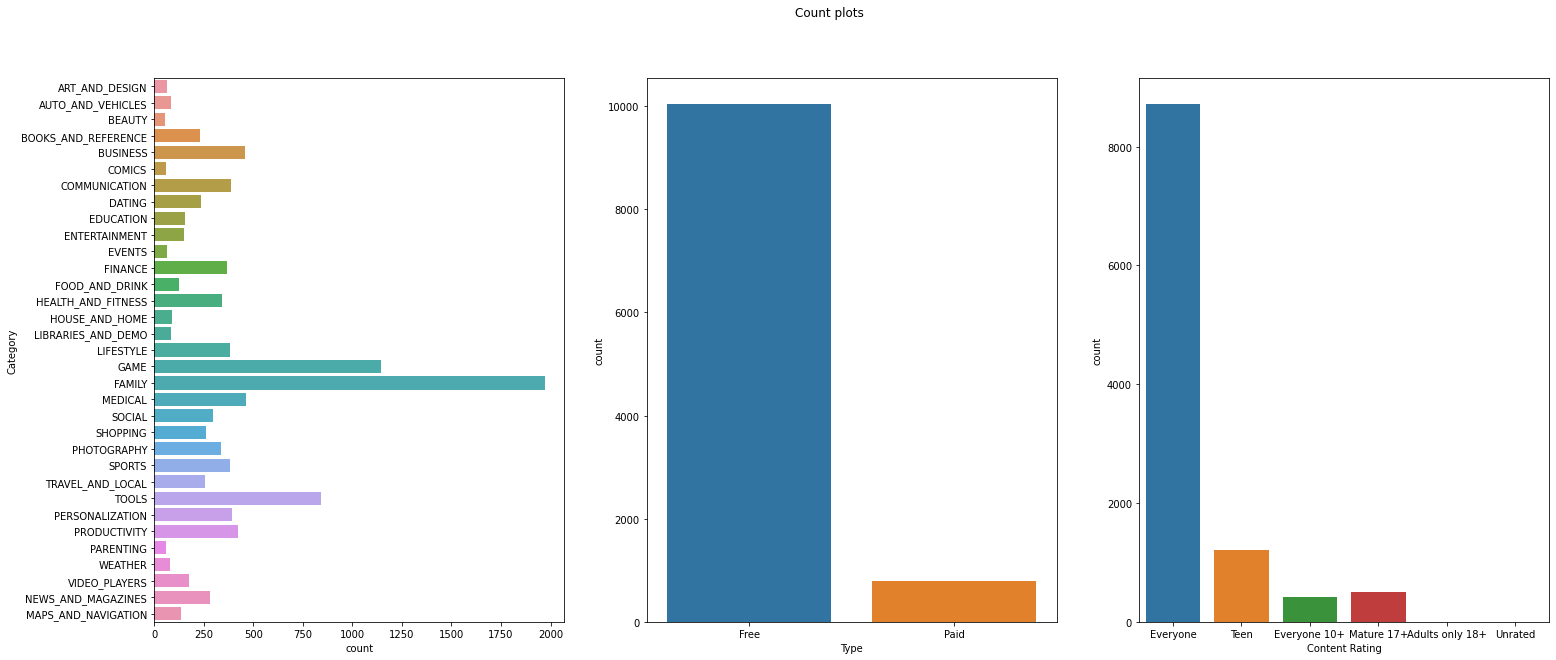

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,10))
plt.suptitle('Count plots')
sns.countplot(y='Category',data=data,ax=ax1)
sns.countplot('Type',data=data,ax=ax2)
sns.countplot('Content Rating',data=data,ax=ax3)
plt.show()

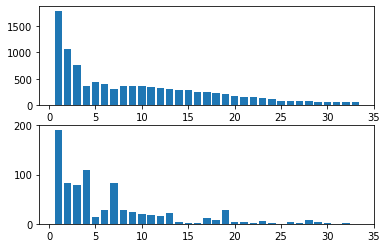

In [ ]:
data_filter = data[['Rating', 'Type', 'Category']]
# Describe Rating dataframe
plot_app_types(data_filter)

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIBRARIES_AND_DEMO'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'WEATHER')]

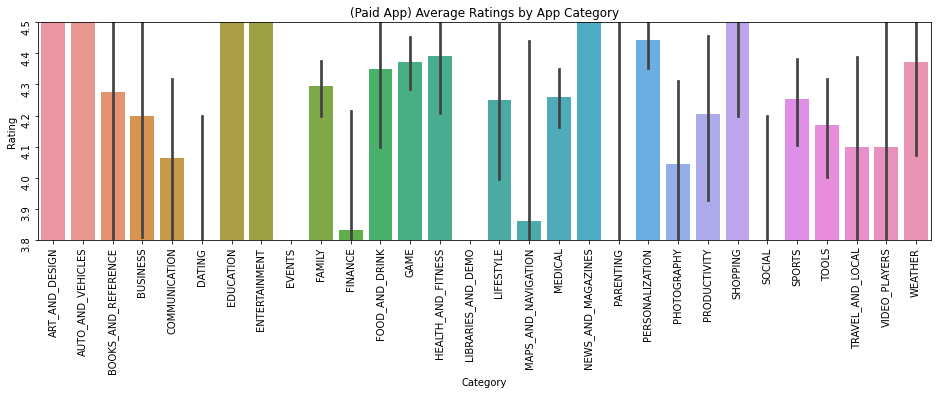

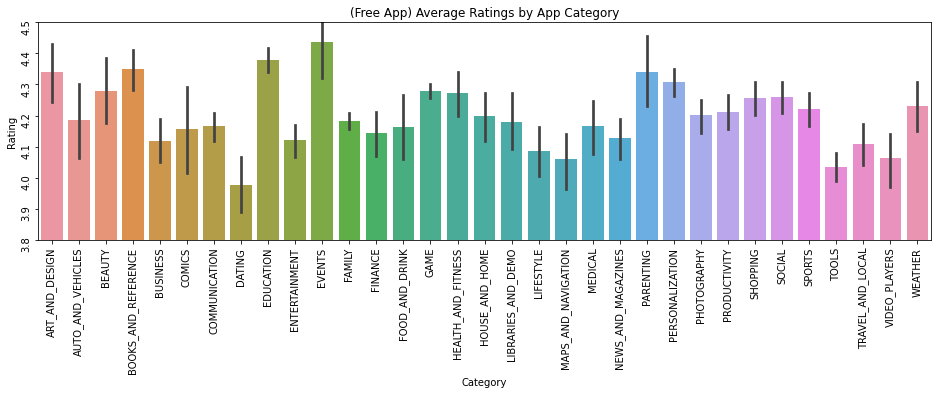

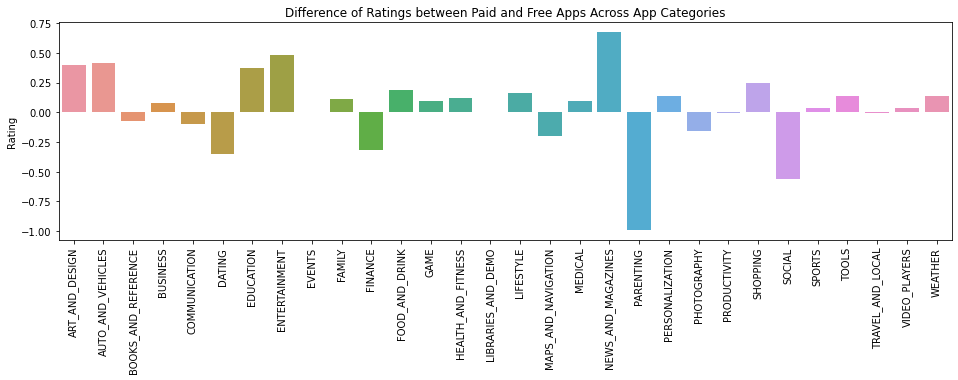

In [ ]:
"""
Rating Distribution based on Free and Paid Apps
"""
paid_stats = plot_target_by_group(data_filter.query('Type == "Paid"'), 'Rating', 'Category', (16, 4), "(Paid App) Average Ratings by App Category")
free_stats = plot_target_by_group(data_filter.query('Type == "Free"'), 'Rating', 'Category', (16, 4), "(Free App) Average Ratings by App Category")


fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
g = sns.barplot(x=sorted_idx, y=rating_diff, ax=ax)
g.set_title("Difference of Ratings between Paid and Free Apps Across App Categories");

g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
data_numerical = data[['Rating', 'Reviews', 'Installs', 'Price']]

In [ ]:
data_numerical

,Rating,Reviews,Installs,Price
0,4.1,159.0,10000,0
1,3.9,967.0,500000,0
2,4.7,87510.0,5000000,0
3,4.5,215644.0,50000000,0
4,4.3,967.0,100000,0
...,...,...,...,...
10836,4.5,38.0,5000,0
10837,5.0,4.0,100,0
10838,NaN,3.0,1000,0
10839,4.5,114.0,1000,0


In [ ]:

data_numerical['Price'] = data_numerical.Price.str.replace('$','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

scaler.fit(data_numerical[['Rating']])
data_numerical['Rating'] = scaler.transform(data_numerical[['Rating']])

scaler.fit(data_numerical[['Price']])
data_numerical['Price'] = scaler.transform(data_numerical[['Price']]) 

scaler.fit(data_numerical[['Installs']])
data_numerical['Installs'] = scaler.transform(data_numerical[['Installs']]) 

scaler.fit(data_numerical[['Reviews']])
data_numerical['Reviews'] = scaler.transform(data_numerical[['Reviews']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
data_numerical

,Rating,Reviews,Installs,Price
0,0.775,2.034333e-06,1.000000e-05,0.0
1,0.725,1.237233e-05,5.000000e-04,0.0
2,0.925,1.119651e-03,5.000000e-03,0.0
3,0.875,2.759067e-03,5.000000e-02,0.0
4,0.825,1.237233e-05,1.000000e-04,0.0
...,...,...,...,...
10836,0.875,4.861927e-07,5.000000e-06,0.0
10837,1.000,5.117818e-08,1.000000e-07,0.0
10838,NaN,3.838364e-08,1.000000e-06,0.0
10839,0.875,1.458578e-06,1.000000e-06,0.0


In [ ]:
data_numerical.dropna()

,Rating,Reviews,Installs,Price
0,0.775,2.034333e-06,1.000000e-05,0.0
1,0.725,1.237233e-05,5.000000e-04,0.0
2,0.925,1.119651e-03,5.000000e-03,0.0
3,0.875,2.759067e-03,5.000000e-02,0.0
4,0.825,1.237233e-05,1.000000e-04,0.0
...,...,...,...,...
10834,0.750,8.956182e-08,5.000000e-07,0.0
10836,0.875,4.861927e-07,5.000000e-06,0.0
10837,1.000,5.117818e-08,1.000000e-07,0.0
10839,0.875,1.458578e-06,1.000000e-06,0.0


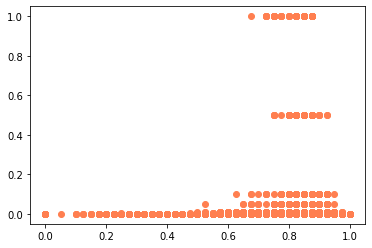

In [ ]:
x, y = data_numerical['Rating'], data_numerical['Installs'] 
plt.scatter(x, y, c = 'coral')
plt.show() 

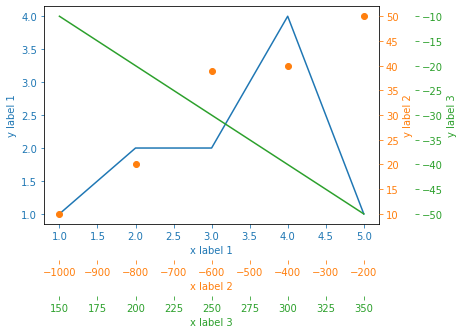

In [ ]:
import matplotlib.pyplot as plt

x_values1=[1,2,3,4,5]
y_values1=[1,2,2,4,1]

x_values2=[-1000,-800,-600,-400,-200]
y_values2=[10,20,39,40,50]

x_values3=[150,200,250,300,350]
y_values3=[-10,-20,-30,-40,-50]


fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(x_values1, y_values1, color="C0")
ax.set_xlabel("x label 1", color="C0")
ax.set_ylabel("y label 1", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.scatter(x_values2, y_values2, color="C1")
ax2.set_xlabel('x label 2', color="C1") 
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 36))
ax2.tick_params(axis='x', colors="C1")
ax2.set_ylabel('y label 2', color="C1")       
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y', colors="C1")

ax3.plot(x_values3, y_values3, color="C2")
ax3.set_xlabel('x label 3', color='C2')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 72))
ax3.tick_params(axis='x', colors='C2')
ax3.set_ylabel('y label 3', color='C2')
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right') 
ax3.spines['right'].set_position(('outward', 36))
ax3.tick_params(axis='y', colors='C2')


plt.show()